## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data description

Variable Name: Description

Carat: Carat weight of the cubic zirconia.

Cut: Describe the cut quality of the cubic zirconia. Quality is in increasing order (Fair, Good, Very Good, Premium, Ideal).
                             
Color: Colour of the cubic zirconia.With D being the best and J the worst.

Clarity: The absence of Inclusions and Blemishes. (In order from Best to Worst: FL = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
                             
Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
                             
Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price: The Price of the cubic zirconia.

X: Length of the cubic zirconia in mm.

Y: Width of the cubic zirconia in mm.

Z: Height of the cubic zirconia in mm.

Dataset for Problem 1: cubic_zirconia.csv

### Import important libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, and shape, and do EDA). Perform univariate and bivariate Analysis.

In [29]:
df = pd.read_csv("cubic_zirconia.csv")

In [30]:
df.shape

(26967, 11)

In [31]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [33]:
df = df.drop('Unnamed: 0', axis=1)

In [34]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [35]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


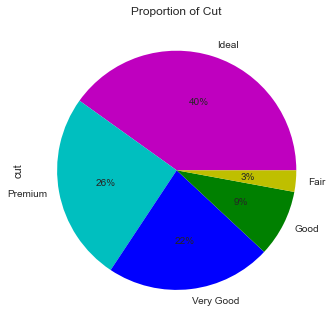

In [36]:
colors = ['m','c','b','g','y']
df.cut.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Cut');

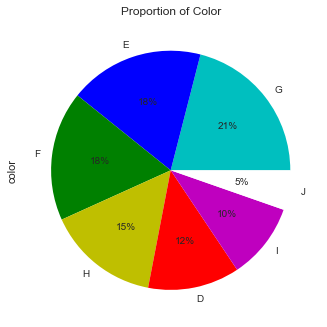

In [37]:
colors = ['c','b','g','y','r','m','w']
df.color.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Color');

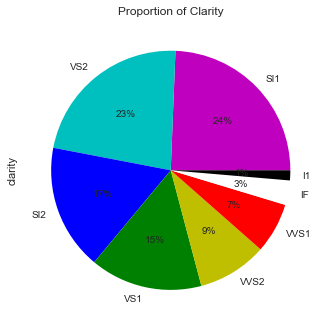

In [38]:
colors = ['m','c','b','g','y','r','w','k']
df.clarity.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Clarity');

In [39]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n');

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


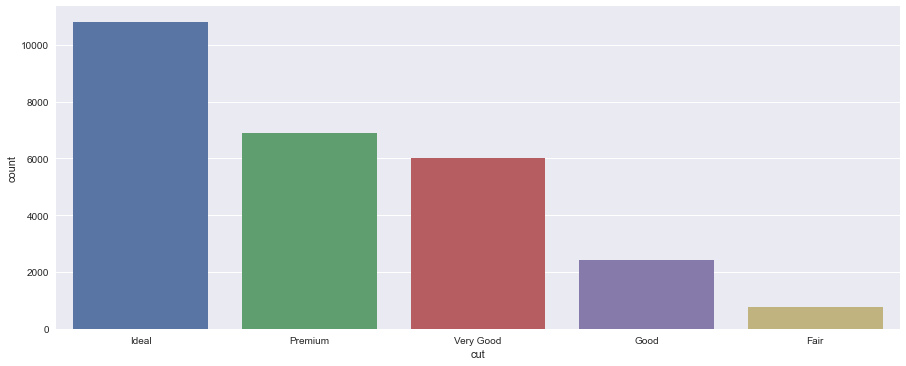

In [40]:
# EDA for categorical columns 'CUT'.
sns.catplot('cut', data=df, kind='count',aspect=2.5);

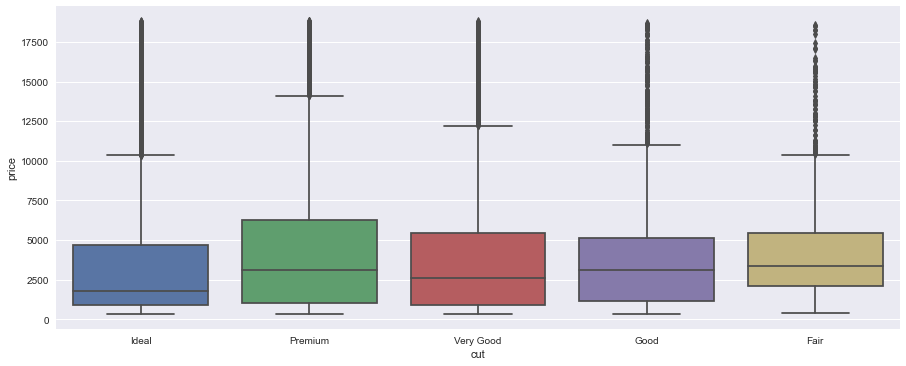

In [41]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5);

Observation on 'Cut': The premium-cut diamonds are the most expensive, followed by those with very good cut.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


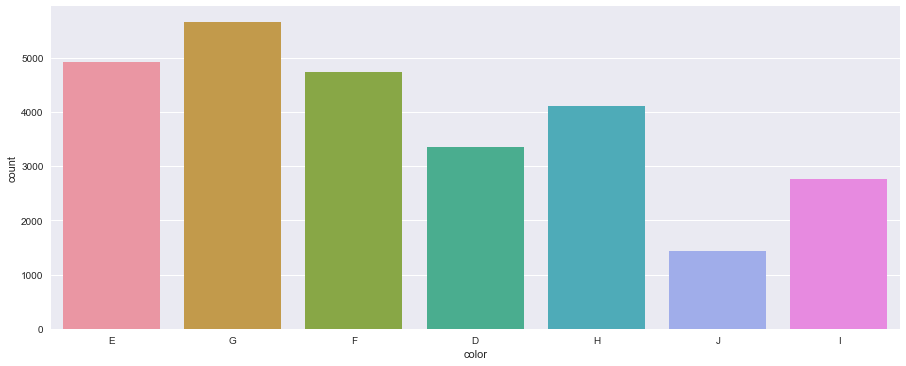

In [42]:
# EDA for categorical columns 'Color'.
sns.catplot('color', kind='count', data=df, aspect=2.5);

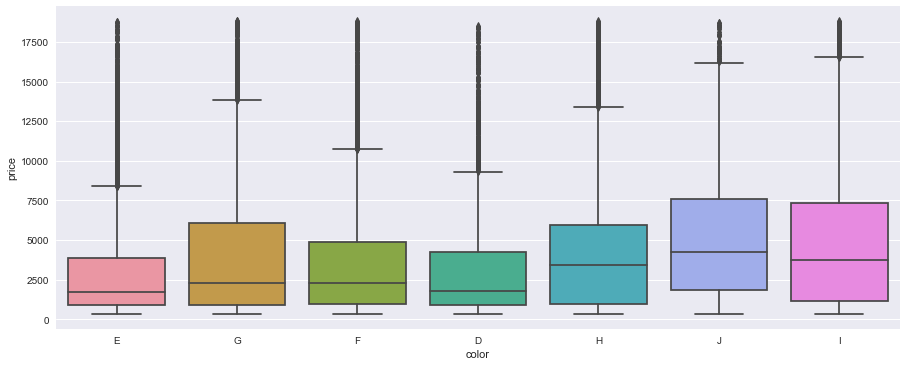

In [43]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box');

Observation on 'Color': The j or worst-color diamonds are the most expensive, followed by I, suggesting some industrial usage.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


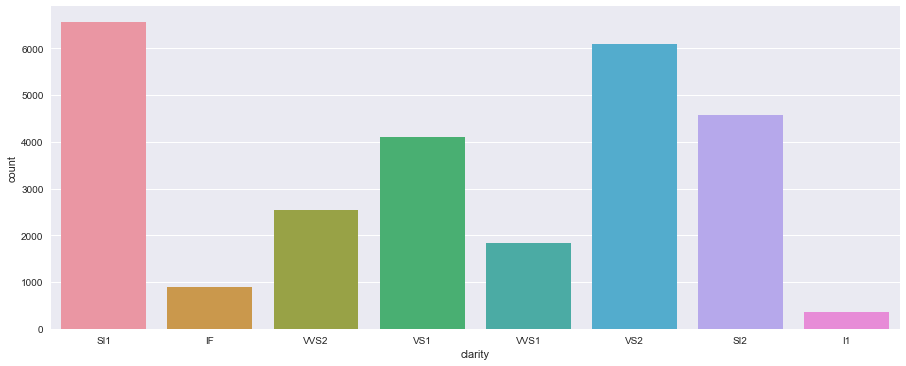

In [44]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=df, kind='count',aspect=2.5);

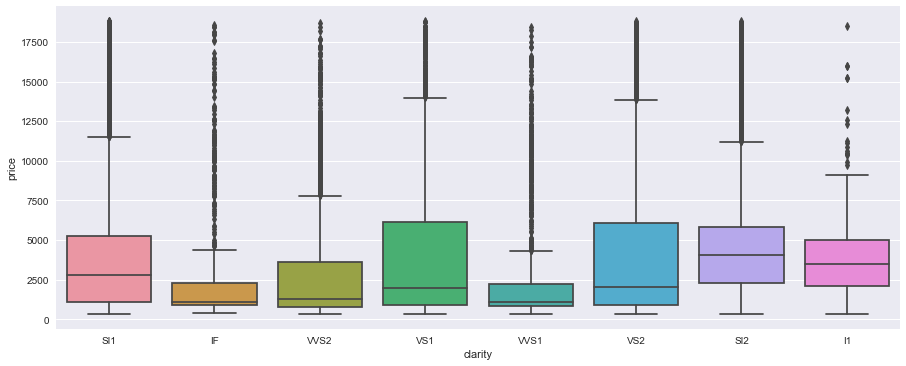

In [45]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box');

Observation on 'clarity': The diamonds with VS1 & VS2 clarity are the most expensive.

In [46]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


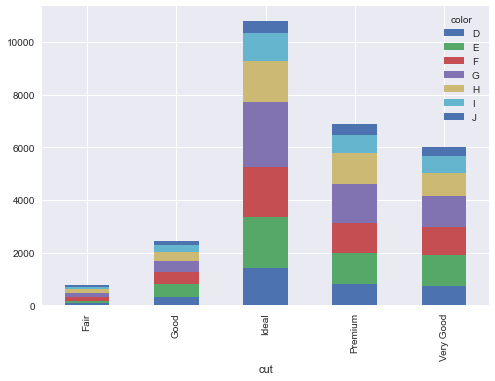

In [47]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True);

In [48]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


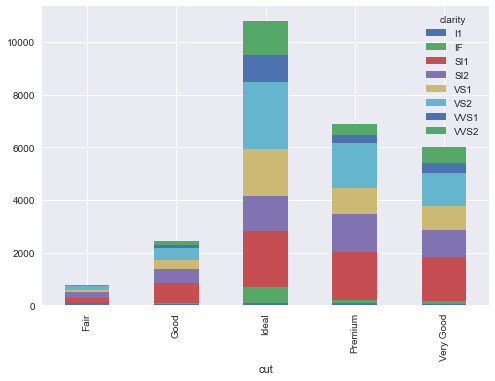

In [49]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True);

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [50]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [51]:
df['depth'] = df['depth'].fillna(df['depth'].mean())          
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [52]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.745147,1.394481,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [54]:
print('Shape before replacing zeros and removing all missing values: ',df.shape)
# Replace 0 in x,y & z to Nan and remove all missing values
df.x = df.x.replace(to_replace = 0 , value =np.nan)
df.y = df.x.replace(to_replace = 0 , value =np.nan)
df.z = df.x.replace(to_replace = 0 , value =np.nan)
df.dropna(inplace=True)
print('Shape after replacing zeros and removing all missing values: ',df.shape)

Shape before replacing zeros and removing all missing values:  (26967, 10)
Shape after replacing zeros and removing all missing values:  (26964, 10)


In [55]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 47


In [56]:
print('Shape before removing duplicate values',df.shape)
df.drop_duplicates(inplace=True) 
print('Shape after removing duplicate values',df.shape)

Shape before removing duplicate values (26964, 10)
Shape after removing duplicate values (26917, 10)


### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [57]:
#df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)
# Doing ordinal encoding for these categoric variables as these are ordinal quality attributes 

cut_dict = {'Fair': 0,
            'Good': 1,
            'Very Good': 2,
            'Premium': 3,
            'Ideal':4
           }
df.cut = df.cut.map(cut_dict)
df.cut.astype(str).astype(int)

color_dict = {'D': 6,'E': 5,'F': 4,'G': 3,'H': 2,'I': 1,'J': 0}
df.color = df.color.map(color_dict)
df.color.astype(str).astype(int)

clarity_dict = {'FL': 10,
               'IF': 9,
               'VVS1': 8,
               'VVS2': 7,
               'VS1': 6,
               'VS2': 5,
               'SI1': 4, 
               'SI2': 3, 
               'I1': 2, 
               'I2': 1, 
               'I3': 0}
df.clarity = df.clarity.map(clarity_dict)
df.clarity.astype(str).astype(int)
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26917 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26917 non-null  float64
 1   cut      26917 non-null  int64  
 2   color    26917 non-null  int64  
 3   clarity  26917 non-null  int64  
 4   depth    26917 non-null  float64
 5   table    26917 non-null  float64
 6   x        26917 non-null  float64
 7   y        26917 non-null  float64
 8   z        26917 non-null  float64
 9   price    26917 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [58]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
carat,26917.0,0.798216,0.477270,0.20,0.40,0.70,1.05,4.50
cut,26917.0,2.909425,1.113041,0.00,2.00,3.00,4.00,4.00
color,26917.0,3.394546,1.706094,0.00,2.00,3.00,5.00,6.00
clarity,26917.0,5.053238,1.646686,2.00,4.00,5.00,6.00,9.00
depth,26917.0,61.745253,1.393892,50.80,61.10,61.80,62.50,73.60
table,26917.0,57.456332,2.231529,49.00,56.00,57.00,59.00,79.00
x,26917.0,5.730351,1.126280,3.73,4.71,5.69,6.55,10.23
y,26917.0,5.730351,1.126280,3.73,4.71,5.69,6.55,10.23
z,26917.0,5.730351,1.126280,3.73,4.71,5.69,6.55,10.23
price,26917.0,3939.013635,4023.138446,326.00,945.00,2375.00,5358.00,18818.00


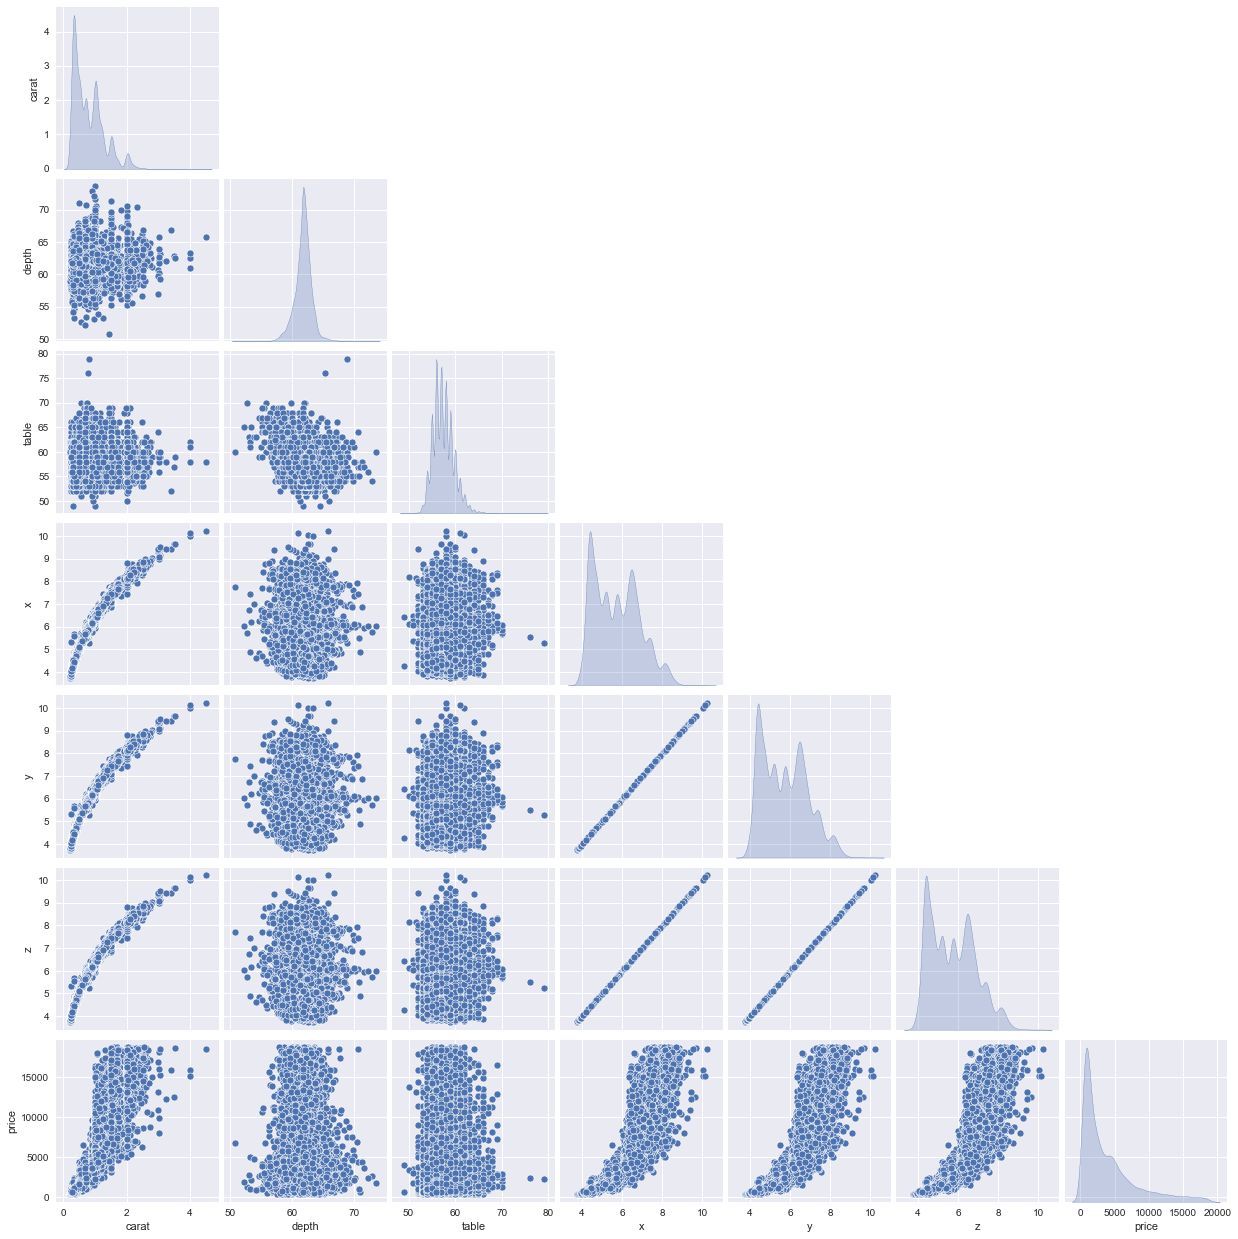

In [59]:
ax = sns.pairplot(df[['carat','depth','table','x','y','z','price']], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

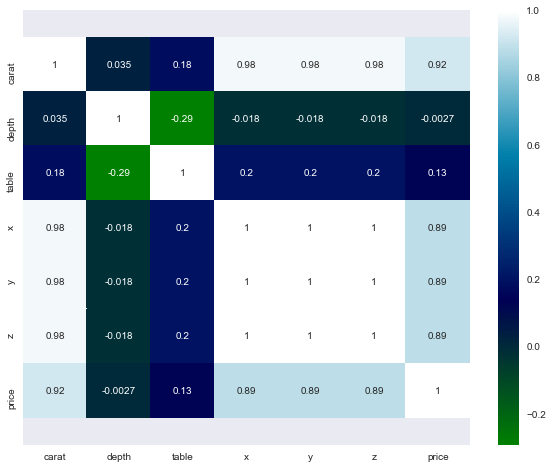

In [60]:
plt.subplots(figsize=(10,8))
ax = sns.heatmap(df[['carat','depth','table','x','y','z','price']].corr(), cmap='ocean', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


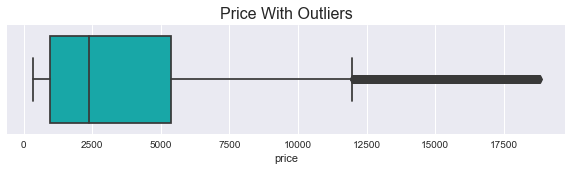

In [61]:
plt.figure(figsize=(10,2))
plt.title('Price With Outliers',fontsize=16)
sns.boxplot(df['price'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


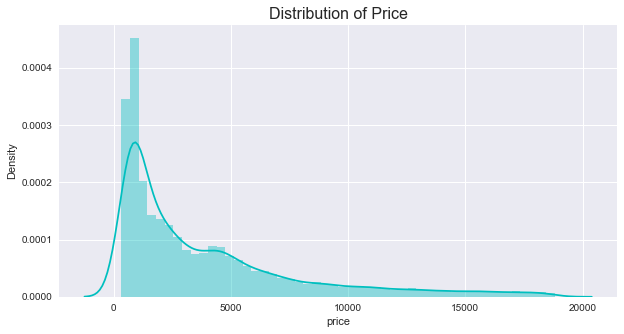

In [62]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Price',fontsize=16)
sns.distplot(df['price'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


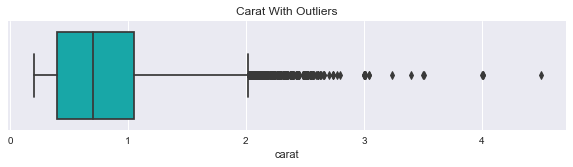

In [63]:
plt.figure(figsize=(10,2))
plt.title('Carat With Outliers',fontsize=12)
sns.boxplot(df['carat'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


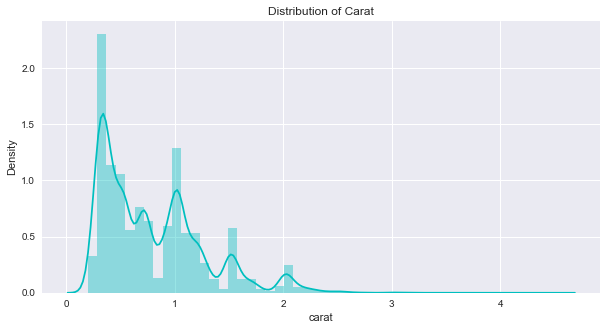

In [64]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Carat',fontsize=12)
sns.distplot(df['carat'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


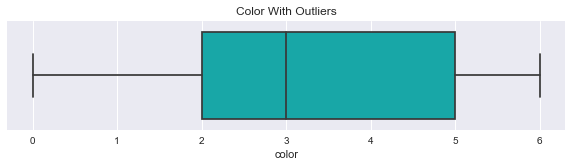

In [65]:
plt.figure(figsize=(10,2))
plt.title('Color With Outliers',fontsize=12)
sns.boxplot(df['color'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


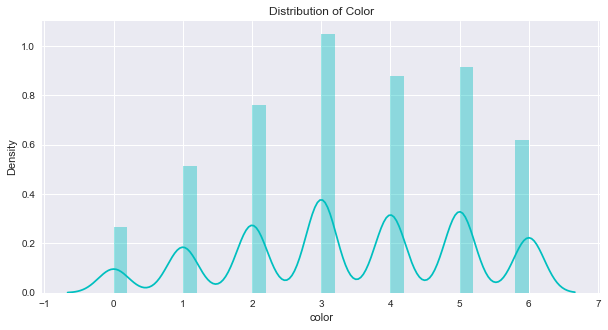

In [66]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Color',fontsize=12)
sns.distplot(df['color'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


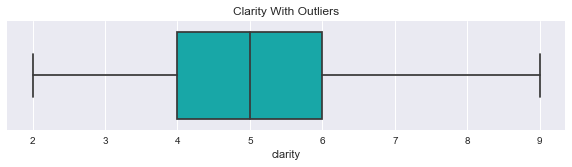

In [67]:
plt.figure(figsize=(10,2))
plt.title('Clarity With Outliers',fontsize=12)
sns.boxplot(df['clarity'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


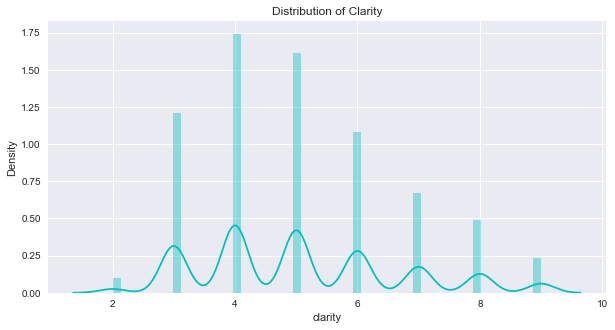

In [68]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Clarity',fontsize=12)
sns.distplot(df['clarity'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


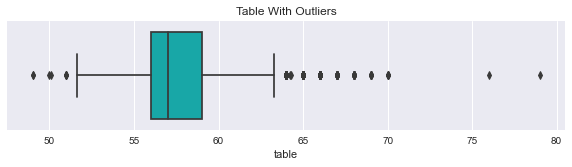

In [69]:
plt.figure(figsize=(10,2))
plt.title('Table With Outliers',fontsize=12)
sns.boxplot(df['table'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


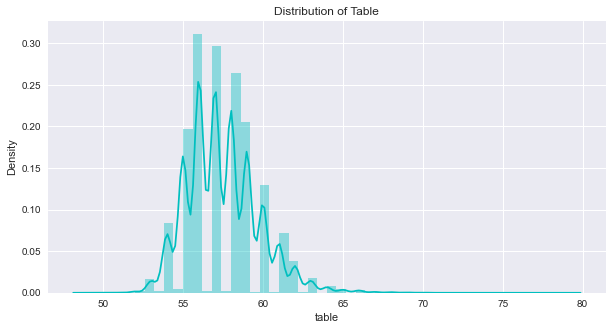

In [70]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Table',fontsize=12)
sns.distplot(df['table'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


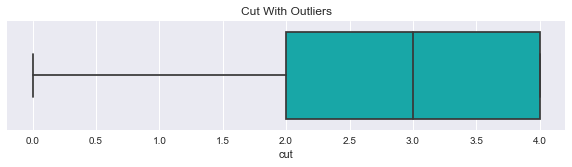

In [71]:
plt.figure(figsize=(10,2))
plt.title('Cut With Outliers',fontsize=12)
sns.boxplot(df['cut'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


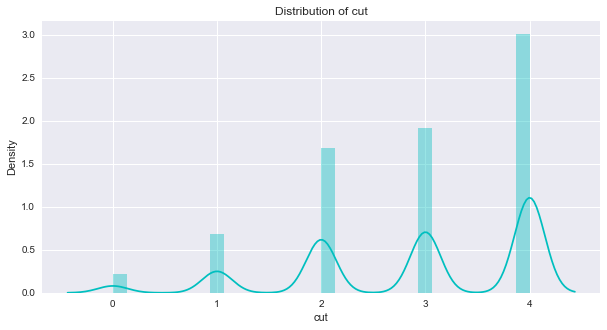

In [72]:
plt.figure(figsize=(10,5))
plt.title('Distribution of cut',fontsize=12)
sns.distplot(df['cut'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


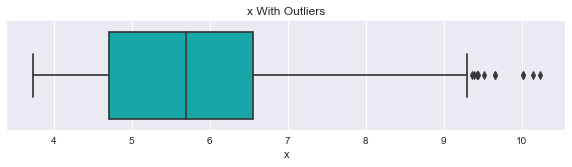

In [73]:
plt.figure(figsize=(10,2))
plt.title('x With Outliers',fontsize=12)
sns.boxplot(df['x'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


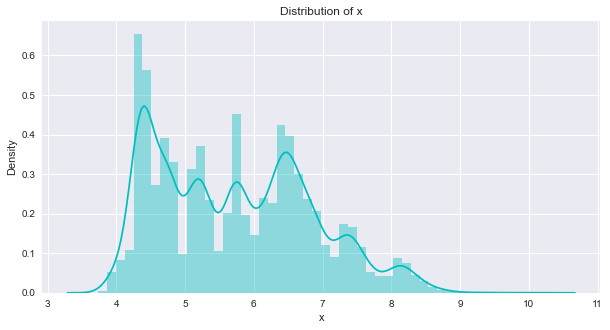

In [74]:
plt.figure(figsize=(10,5))
plt.title('Distribution of x',fontsize=12)
sns.distplot(df['x'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


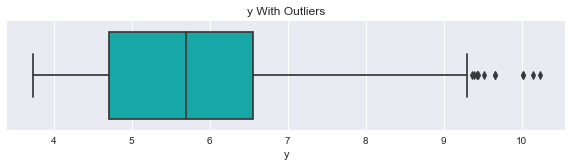

In [75]:
plt.figure(figsize=(10,2))
plt.title('y With Outliers',fontsize=12)
sns.boxplot(df['y'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


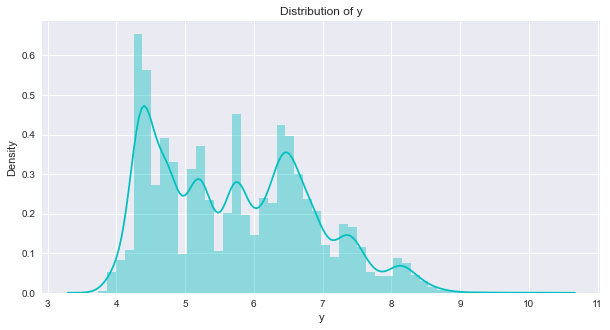

In [76]:
plt.figure(figsize=(10,5))
plt.title('Distribution of y',fontsize=12)
sns.distplot(df['y'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


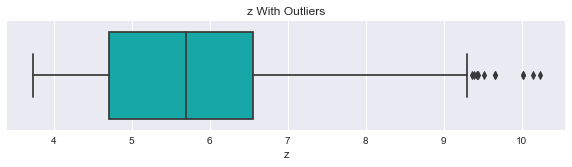

In [77]:
plt.figure(figsize=(10,2))
plt.title('z With Outliers',fontsize=12)
sns.boxplot(df['z'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


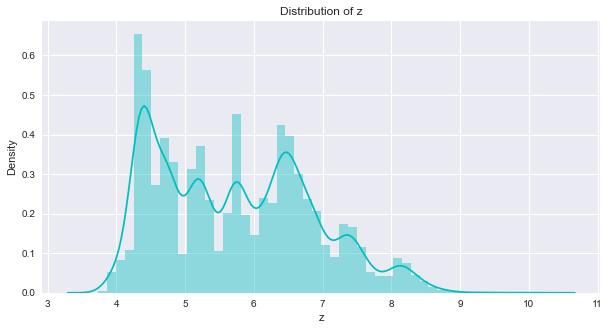

In [78]:
plt.figure(figsize=(10,5))
plt.title('Distribution of z',fontsize=12)
sns.distplot(df['z'], color = 'c' );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


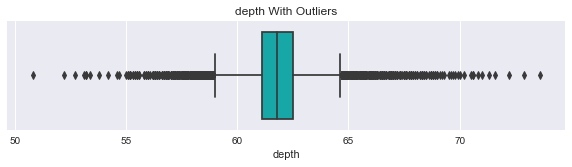

In [79]:
plt.figure(figsize=(10,2))
plt.title('depth With Outliers',fontsize=12)
sns.boxplot(df['depth'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


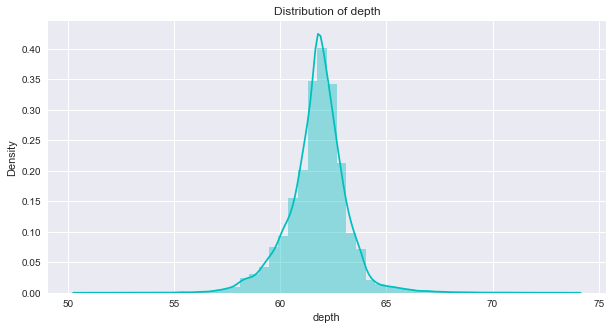

In [80]:
plt.figure(figsize=(10,5))
plt.title('Distribution of depth',fontsize=12)
sns.distplot(df['depth'], color = 'c' );

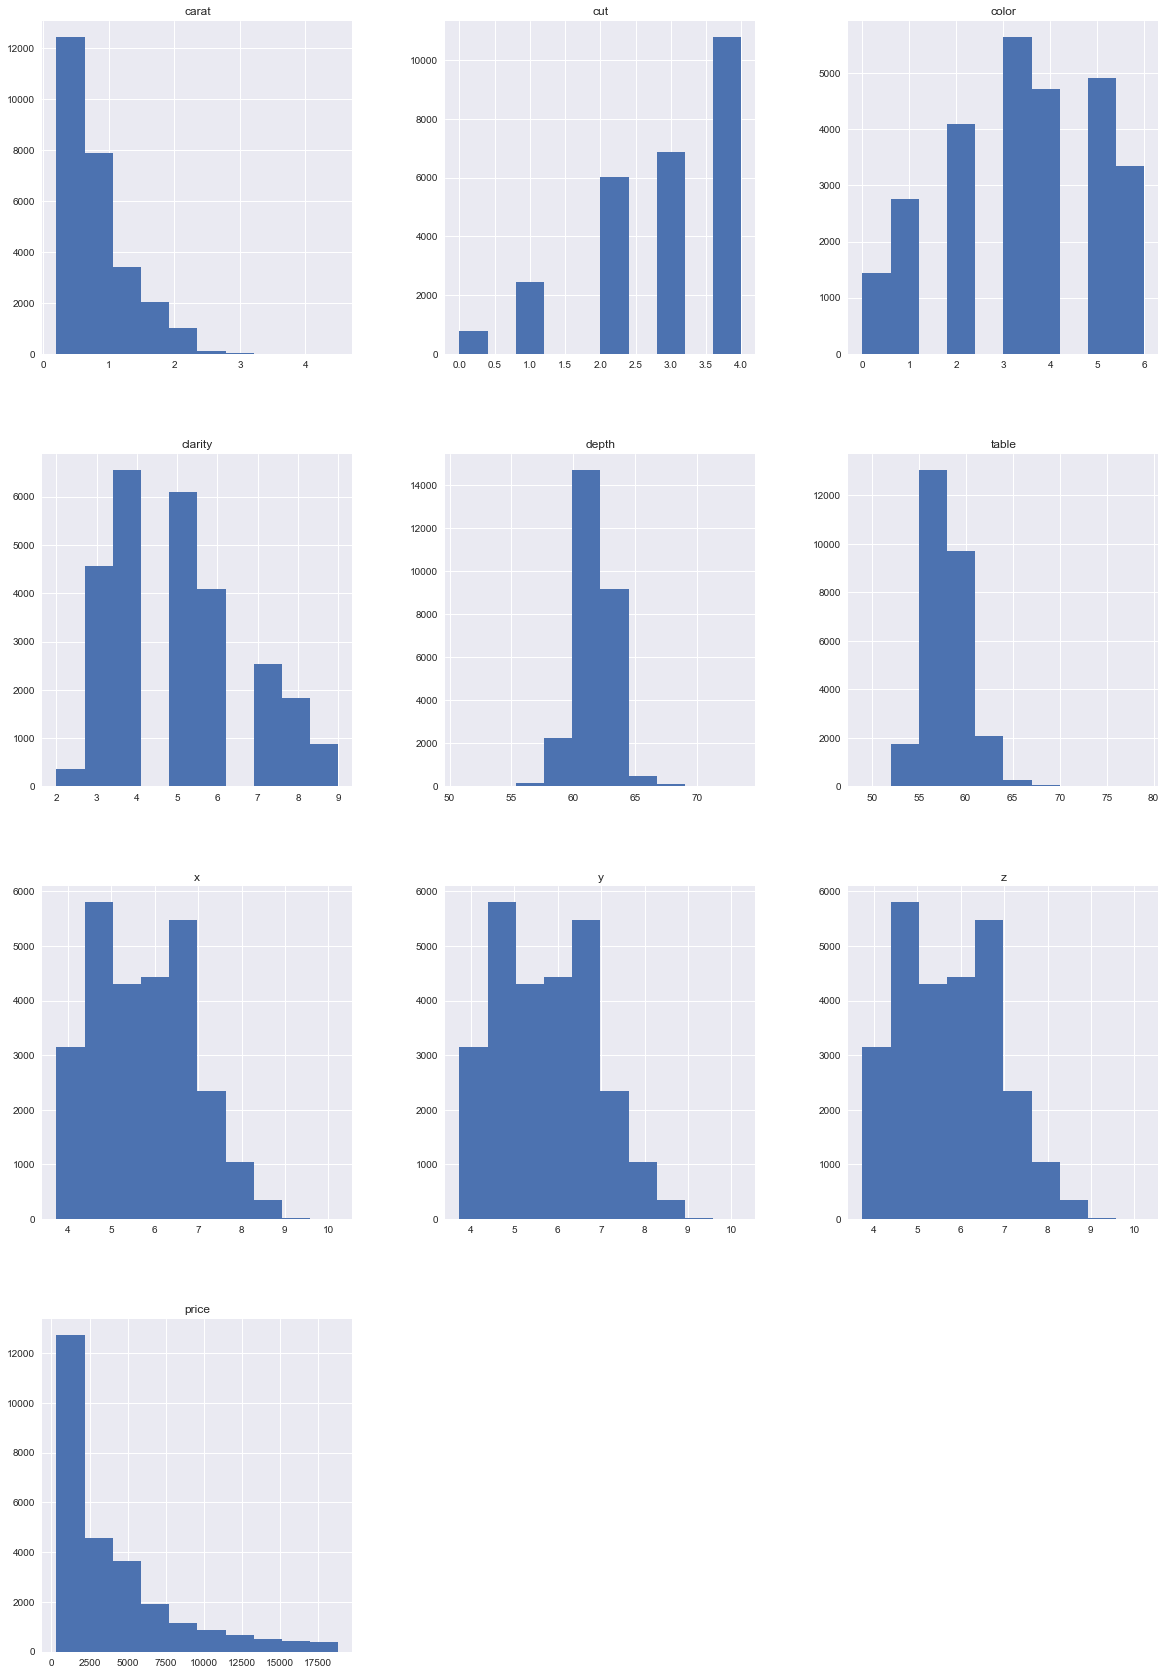

In [81]:
df.hist(figsize=(20,30));

In [85]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='ocean')

In [86]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='ocean')

In [87]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='ocean')

The inferences drawn from the above Exploratory Data analysis:

Observation-1: (1).'Price' is the target variable while all others are the predictors. (2).The data set contains 26967 rows and 11 columns. (3).In the given dataset, there are 2 integer-type features 6 float-type features, and 3 object-type features, where 'price' is the target variable and all other are predector variable. (4).The first column ("Unnamed: 0") is an index of some sort or only a serial numbers, so we removed it.

Observation-2: (1).In the given dataset, the the mean and median values do not differ a lot. (2).We can observe the minimum values of "x", "y", "z" to be zero. These are faulty values, as dimensionless or 2-dimensional diamonds are not possible. So we have to filter out those obvious faulty data entries. (3).There are three object data types: 'cut', 'color' and 'clarity'.

Observation-3: There are 697 missing values in the depth column. There are some duplicate rows (34 out of 26,958 or 0.12 % of the total data), so in this case, we can drop the duplicated rows safely.

Observation-4: There are significant amount of outliers, points that are far from the rest of the dataset, which will affect the outcome of our regression model. So, we have to treat the outliars. The distribution of some quantitative features such as "carat" and the target feature "price" are "right-skewed" heavily.

Observation-5: Most features seem to correlate with the price of the diamond. The notable exception is "depth", which has a negligble correlation (~1%).

<AxesSubplot:>

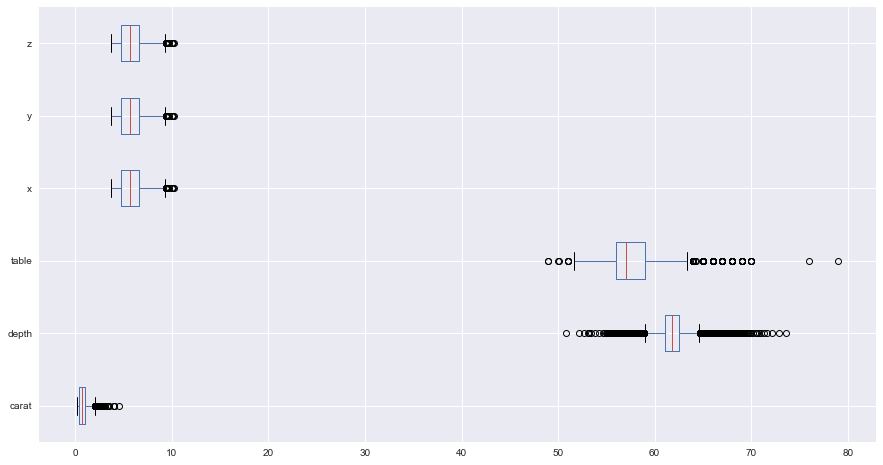

In [88]:
df[['carat','depth','table','x','y','z']].boxplot(figsize=(15,8), vert = 0)
#ns.boxplot(df[['carat','depth','table','x','y','z']] )

In [96]:
# To decide on removing outliers or not, checking the linear distribution of price against independent variables

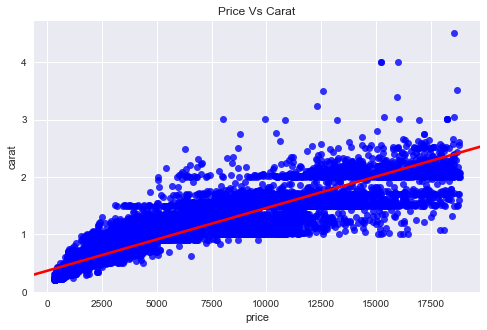

In [89]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="carat", data=df, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs Carat');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


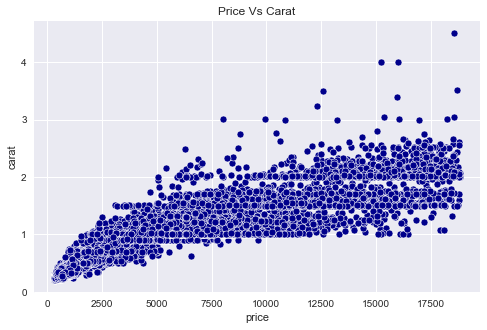

In [90]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['price'], df['carat'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Carat');

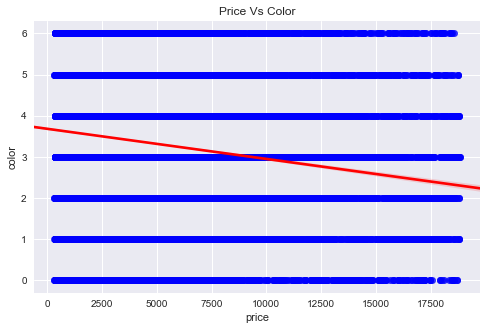

In [91]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="color", data=df, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs Color');

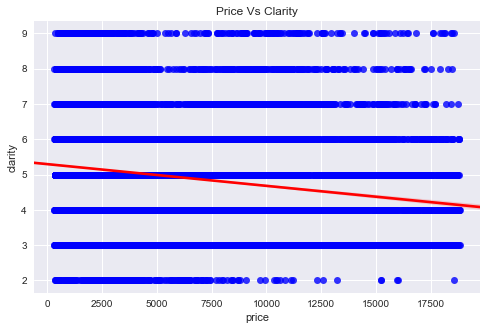

In [92]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="clarity", data=df, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs Clarity');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


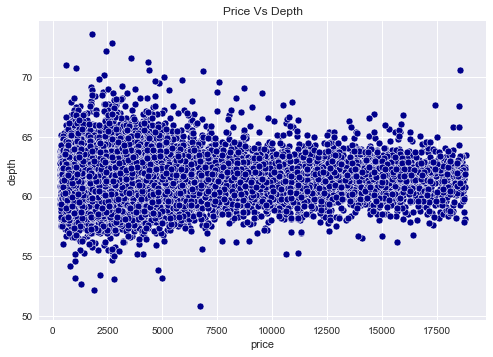

In [93]:
sns.scatterplot(df['price'], df['depth'], color = 'darkblue')
#sns.despine(left = False, bottom = False)
plt.title('Price Vs Depth');

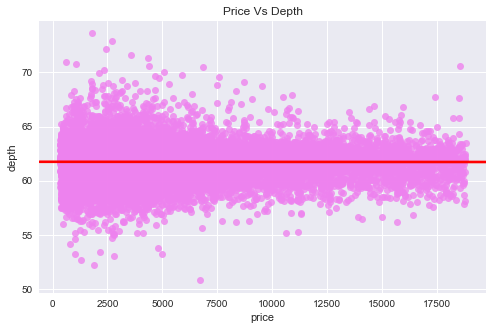

In [94]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="depth", data=df, truncate=False, scatter_kws={"color": "violet"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs Depth');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


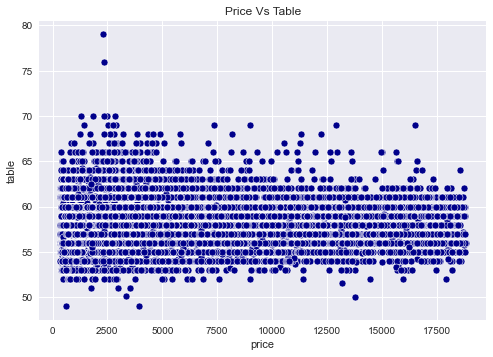

In [95]:
sns.scatterplot(df['price'], df['table'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Table');

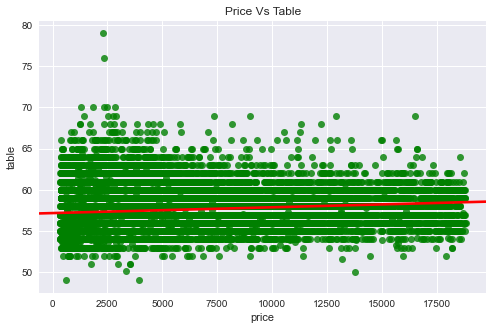

In [96]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="table", data=df, truncate=False, scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs Table');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


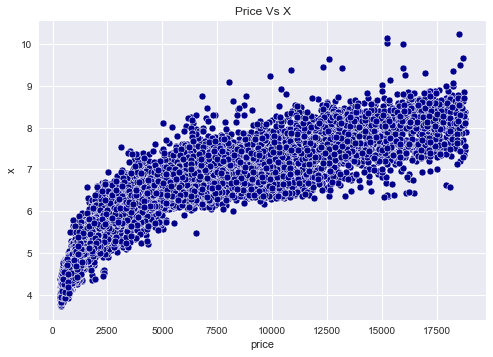

In [97]:
sns.scatterplot(df['price'], df['x'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs X');

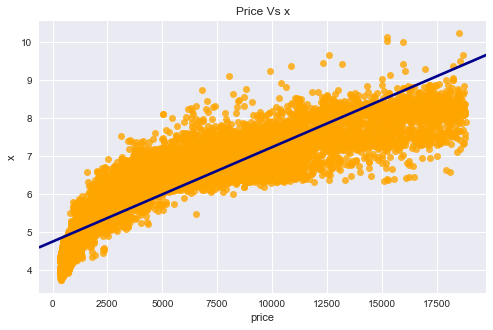

In [98]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="x", data=df, truncate=False, scatter_kws={"color": "orange"}, line_kws={"color": "darkblue"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs x');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


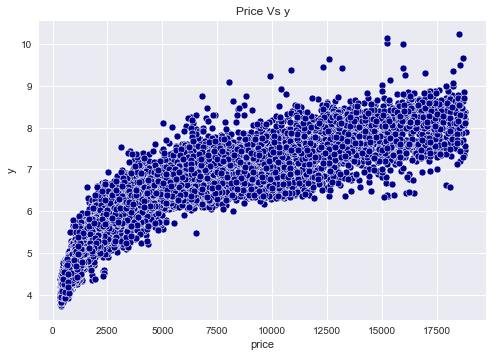

In [99]:
sns.scatterplot(df['price'], df['y'], color = 'darkblue')
sns.despine(left = False, bottom = False)
plt.title('Price Vs y');

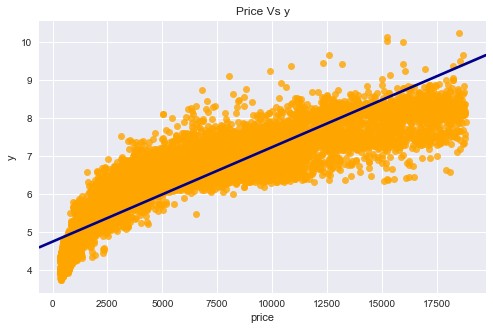

In [100]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="y", data=df, truncate=False, scatter_kws={"color": "orange"}, line_kws={"color": "darkblue"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs y');

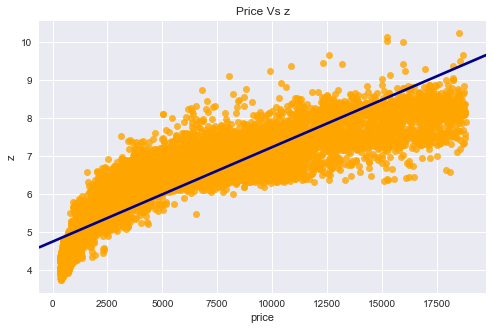

In [101]:
plt.figure(figsize=(8,5))
sns.regplot(x="price", y="z", data=df, truncate=False, scatter_kws={"color": "orange"}, line_kws={"color": "darkblue"})
sns.despine(left = False, bottom = False)
plt.title('Price Vs z');

In [102]:
# Removing outliers as outliers in price and carat can influence the linear equation towards the outliers

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [104]:
#cont=df[['carat','depth','table','x','y','z', 'price']].index
for column in df[['carat','depth','table','x','y','z', 'price']].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

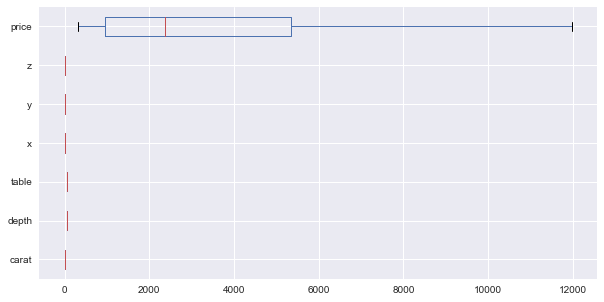

In [105]:
df[['carat','depth','table','x','y','z', 'price']].boxplot(figsize=(10,5), vert = 0);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


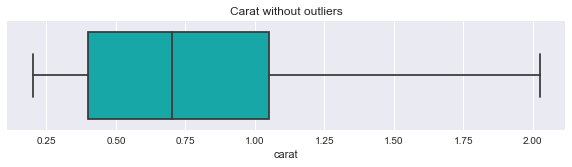

In [106]:
plt.figure(figsize=(10,2))
plt.title('Carat without outliers',fontsize=12)
sns.boxplot(df['carat'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


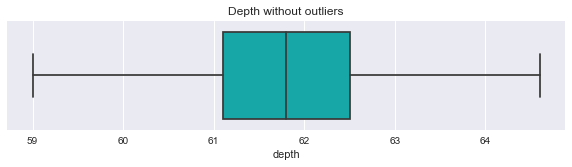

In [107]:
plt.figure(figsize=(10,2))
plt.title('Depth without outliers',fontsize=12)
sns.boxplot(df['depth'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


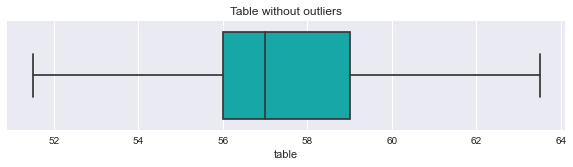

In [108]:
plt.figure(figsize=(10,2))
plt.title('Table without outliers',fontsize=12)
sns.boxplot(df['table'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


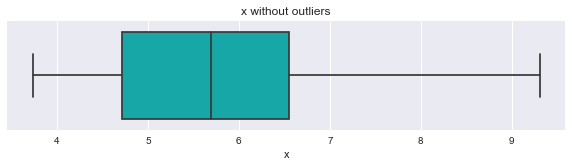

In [109]:
plt.figure(figsize=(10,2))
plt.title('x without outliers',fontsize=12)
sns.boxplot(df['x'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


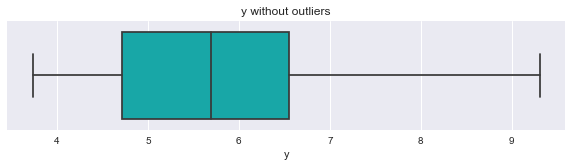

In [110]:
plt.figure(figsize=(10,2))
plt.title('y without outliers',fontsize=12)
sns.boxplot(df['y'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


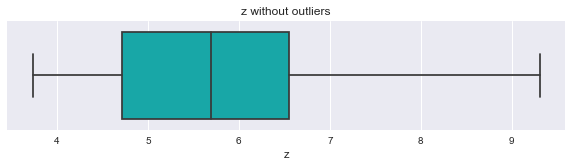

In [111]:
plt.figure(figsize=(10,2))
plt.title('z without outliers',fontsize=12)
sns.boxplot(df['z'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


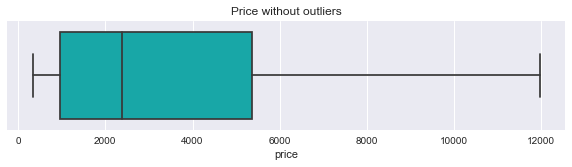

In [112]:
plt.figure(figsize=(10,2))
plt.title('Price without outliers',fontsize=12)
sns.boxplot(df['price'] , orient = "h" , color = 'c'); 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


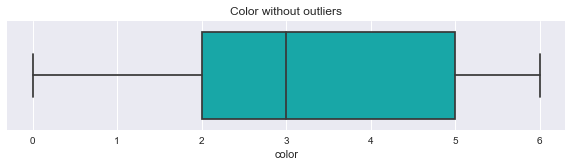

In [113]:
plt.figure(figsize=(10,2))
plt.title('Color without outliers',fontsize=12)
sns.boxplot(df['color'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


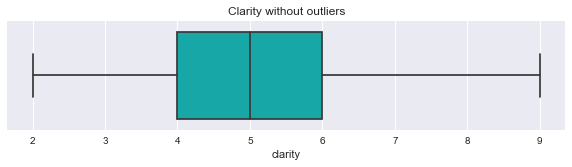

In [114]:
plt.figure(figsize=(10,2))
plt.title('Clarity without outliers',fontsize=12)
sns.boxplot(df['clarity'] , orient = "h" , color = 'c');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


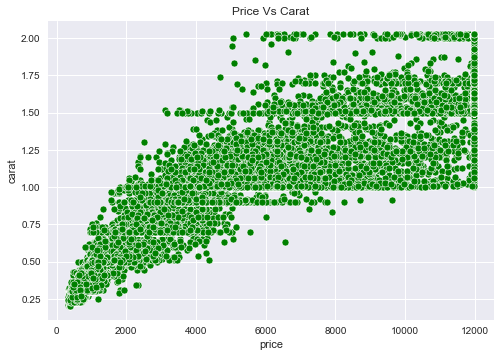

In [115]:
sns.scatterplot(df['price'], df['carat'], color = 'green')
sns.despine(left = False, bottom = False)
plt.title('Price Vs Carat');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


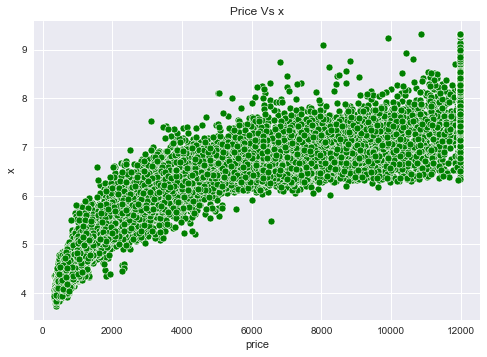

In [116]:
sns.scatterplot(df['price'], df['x'], color = 'green')
sns.despine(left = False, bottom = False)
plt.title('Price Vs x');

In [117]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=25)

In [119]:
X_train.shape

(18841, 9)

In [120]:
X_test.shape

(8076, 9)

In [121]:
y_train.shape

(18841, 1)

In [122]:
y_test.shape

(8076, 1)

In [123]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [124]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8892.062993696514
The coefficient for cut is 104.55511505651437
The coefficient for color is 267.76628197735033
The coefficient for clarity is 434.1590655419247
The coefficient for depth is -35.00943288069535
The coefficient for table is -11.74099667010334
The coefficient for x is -135.7609753524804
The coefficient for y is -135.76097535248027
The coefficient for z is -135.76097535248047


In [125]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1554.9405604717886


In [126]:
rsquare = regression_model.score(X_test, y_test)
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9272335173251998


In [127]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,predicted_train))
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 905.0572421449743


In [128]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,predicted_test))
print("The Root Mean Squared Error for test {}".format(RMSE_test))

The Root Mean Squared Error for test 931.9221883970914


### Linear Regression using statsmodels

In [129]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
17417,0.320,4,2,9,61.9,54.2,4.38,4.38,4.38,783.0
22393,0.340,3,3,5,61.2,59.0,4.43,4.43,4.43,596.0
20522,2.025,2,1,5,62.5,58.0,8.09,8.09,8.09,11977.5
13908,0.510,4,3,5,62.4,56.0,5.11,5.11,5.11,1438.0
4534,0.320,3,2,5,62.7,58.0,4.35,4.35,4.35,605.0


In [130]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [131]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1554.940560
carat        8892.062994
cut           104.555115
color         267.766282
clarity       434.159066
depth         -35.009433
table         -11.740997
x            -135.760975
y            -135.760975
z            -135.760975
dtype: float64

In [132]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.698e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:27:35   Log-Likelihood:            -1.5500e+05
No. Observations:               18841   AIC:                         3.100e+05
Df Residuals:                   18833   BIC:                         3.101e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1554.9406    584.803     -2.659      0.0

In [57]:
#The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0
#The P value of all the independent variables are less than alpha, means all the variables are statistically significant in deciding Price
#The model can explain 93.2%of the variance in price as both the R squared and adjusted R squared values are .932

In [133]:
#mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
MSE_train = np.mean((lm1.predict(X_train)- y_train['price'])**2)

In [134]:
RMSE_train = np.sqrt(MSE_train)
print("The Root Mean Squared Error for train {}".format(RMSE_train))

The Root Mean Squared Error for train 905.0572421449742


In [135]:
np.sqrt(lm1.mse_resid) #same as above but another way

905.2494496846291

In [136]:
# Prediction on Test data
y_pred = lm1.predict(X_test)

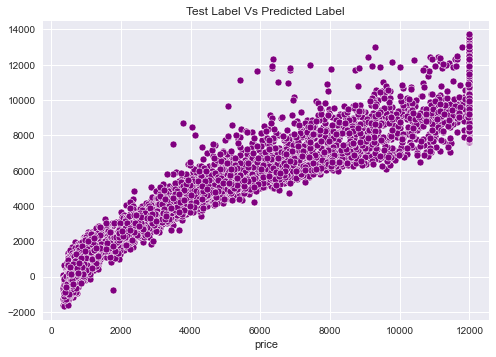

In [137]:
sns.scatterplot(x=y_test['price'], y=y_pred, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label');

In [143]:
#test for normality of residuals
import statsmodels.api as sm
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot(model.resid);
    plt.figure( figsize = (8,6));
    probplot.ppplot(line='45');
    plt.title(title);
    plt.show();

<Figure size 576x432 with 0 Axes>

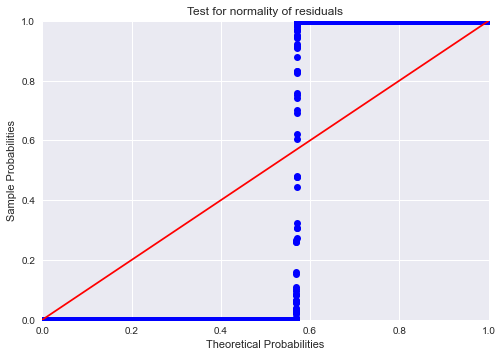

In [144]:
draw_pp_plot(lm1,"Test for normality of residuals");

In [145]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

In [146]:
def plot_resid_fitted(fitted, resid, title):
    sns.scatterplot(x=get_standardized_values( fitted ),
                    y=get_standardized_values( resid ),
                    color = 'darkblue')
    sns.despine(left = False, bottom = False) 
    plt.xlabel("Standardized predicted values")
    plt.ylabel("standardized residual values")
    plt.title(title);

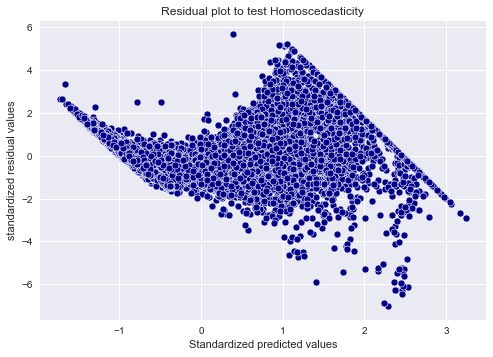

In [147]:
plot_resid_fitted(lm1.fittedvalues,
                  lm1.resid,
                  "Residual plot to test Homoscedasticity")

In [161]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1554.94) * Intercept + (8892.06) * carat + (104.56) * cut + (267.77) * color + (434.16) * clarity + (-35.01) * depth + (-11.74) * table + (-135.76) * x + (-135.76) * y + (-135.76) * z + 

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_m = np.asmatrix(X)
    vif = [variance_inflation_factor(X_m,i) for i in range (X_m.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column']= X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [163]:
vif_factors = get_vif_factors(X)
vif_factors

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,carat,107.749383
1,cut,8.843211
2,color,5.535496
3,clarity,12.451131
4,depth,574.800463
5,table,577.205320
6,x,inf
7,y,inf
8,z,inf


In [164]:
vif_factors = get_vif_factors(X[['carat','cut','color','clarity','depth','table','x']])
vif_factors

,column,VIF
0,carat,107.749383
1,cut,8.843211
2,color,5.535496
3,clarity,12.451131
4,depth,574.800463
5,table,577.205320
6,x,738.541750


In [ ]:
############# ITERATION 2 ##########

In [165]:
## trying to improve the model

In [166]:
y_train_sqrt = np.sqrt(y_train['price']) # transforming the response variable

In [167]:
data_train2 = pd.concat([X_train, y_train_sqrt], axis=1)
data_test2 = pd.concat([X_test,y_test],axis=1)
data_train2['volume']= data_train2['x']*data_train2['y']*data_train2['z']
data_test2['volume']= data_test2['x']*data_test2['y']*data_test2['z']
data_train2.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
17417,0.320,4,2,9,61.9,54.2,4.38,4.38,4.38,27.982137,84.027672
22393,0.340,3,3,5,61.2,59.0,4.43,4.43,4.43,24.413111,86.938307
20522,2.025,2,1,5,62.5,58.0,8.09,8.09,8.09,109.441765,529.475129
13908,0.510,4,3,5,62.4,56.0,5.11,5.11,5.11,37.920970,133.432831
4534,0.320,3,2,5,62.7,58.0,4.35,4.35,4.35,24.596748,82.312875
8764,0.750,4,3,7,61.3,55.0,5.85,5.85,5.85,59.371710,200.201625
23555,0.800,2,4,6,63.6,57.0,5.82,5.82,5.82,59.657355,197.137368
18605,2.020,4,1,3,61.7,57.0,8.05,8.05,8.05,109.441765,521.660125
2896,0.430,3,3,4,62.7,56.0,4.83,4.83,4.83,31.112698,112.678587
5993,1.070,4,3,3,62.4,57.0,6.56,6.56,6.56,66.475559,282.300416


In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_m = np.asmatrix(X)
    vif = [variance_inflation_factor(X_m,i) for i in range (X_m.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column']= X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [169]:
vif_factors = get_vif_factors(X)
vif_factors

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,carat,107.749383
1,cut,8.843211
2,color,5.535496
3,clarity,12.451131
4,depth,574.800463
5,table,577.205320
6,x,inf
7,y,inf
8,z,inf


In [170]:
vif_factors = get_vif_factors(data_train2[['carat','cut','color','clarity','x','volume']])
vif_factors

,column,VIF
0,carat,319.081330
1,cut,8.423378
2,color,5.517011
3,clarity,11.330653
4,x,72.369493
5,volume,285.472354


In [171]:
expr = 'price ~ carat + cut + color + clarity + volume + x'

In [172]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr, data = data_train2).fit()
lm2.params

Intercept   -89.080297
carat        49.669038
cut           0.737454
color         1.987285
clarity       3.257709
volume       -0.115795
x            18.077889
dtype: float64

In [173]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 8.234e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:38:18   Log-Likelihood:                -57661.
No. Observations:               18841   AIC:                         1.153e+05
Df Residuals:                   18834   BIC:                         1.154e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -89.0803      0.770   -115.694      0.0

<Figure size 576x432 with 0 Axes>

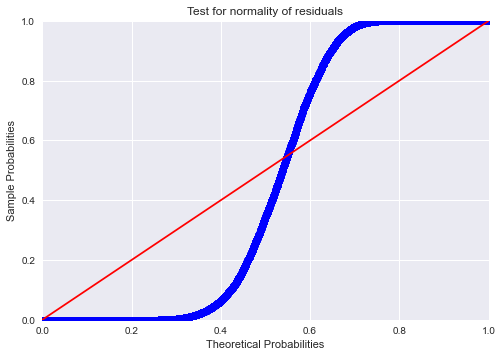

In [174]:
draw_pp_plot(lm2,"Test for normality of residuals")

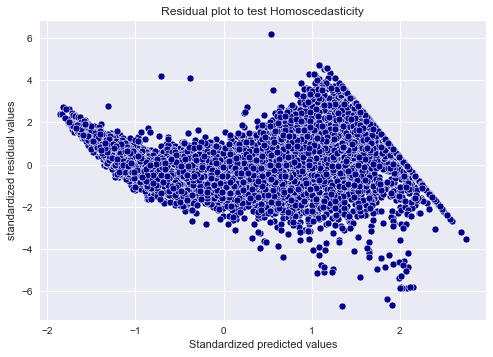

In [175]:
plot_resid_fitted(lm2.fittedvalues,
                  lm2.resid,
                  "Residual plot to test Homoscedasticity")

In [176]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1554.94) * Intercept + (8892.06) * carat + (104.56) * cut + (267.77) * color + (434.16) * clarity + (-35.01) * depth + (-11.74) * table + (-135.76) * x + (-135.76) * y + (-135.76) * z + 

In [177]:
y_pred_train = lm2.predict(data_train2.drop('price',axis=1))

In [178]:
rmse_train = np.sqrt(mean_squared_error(data_train2['price'],y_pred_train))
print("The Root Mean Squared Error for train {}".format(rmse_train))

The Root Mean Squared Error for train 5.1627285575168775


In [179]:
# Prediction on Test data. taking the square of Y as test price was not transformed
y_pred_test = np.power(lm2.predict(data_test2.drop('price',axis=1)),2)

In [180]:
#mse_test = np.mean((y_pred-data_test2['price'])**2)

In [181]:
rmse_test = np.sqrt(mean_squared_error(data_test2['price'],y_pred_test))
print("The Root Mean Squared Error for test {}".format(rmse_test))

The Root Mean Squared Error for test 816.7544672187873


In [182]:
rsquare = metrics.r2_score(y_pred_test, data_test2['price'])
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9381834925086128


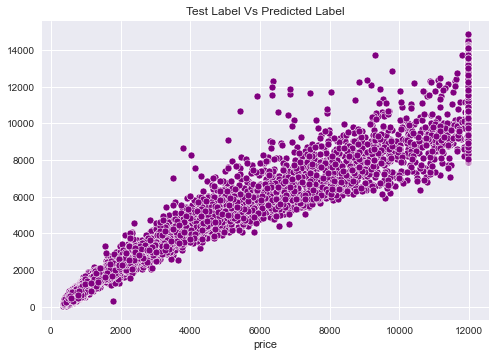

In [183]:
sns.scatterplot(x=y_test['price'], y=y_pred_test, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label');

In [ ]:
############### ITERATION 3 ###################

In [124]:
## attempting scaling on the data

In [184]:
from scipy.stats import zscore

X_train['volume']=X_train['x']*X_train['y']*X_train['z']
X_test['volume']=X_test['x']*X_test['y']*X_test['z']
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)
X_train_scaled = X_train_scaled.drop('y', axis=1)
X_train_scaled = X_train_scaled.drop('z', axis=1)
X_train_scaled = X_train_scaled.drop('depth', axis=1)
X_train_scaled = X_train_scaled.drop('table', axis=1)
X_test_scaled = X_test_scaled.drop('y', axis=1)
X_test_scaled = X_test_scaled.drop('z', axis=1)
X_test_scaled = X_test_scaled.drop('depth', axis=1)
X_test_scaled = X_test_scaled.drop('table', axis=1)

<ipython-input-184-a38dbf629ad4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['volume']=X_train['x']*X_train['y']*X_train['z']
<ipython-input-184-a38dbf629ad4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['volume']=X_test['x']*X_test['y']*X_test['z']


In [185]:
X_train_scaled

,carat,cut,color,clarity,x,volume
17417,-1.020850,0.977964,-0.820537,2.418378,-1.195297,-1.006207
22393,-0.977707,0.078398,-0.233072,-0.026832,-1.150990,-0.983049
20522,2.657119,-0.821169,-1.408002,-0.026832,2.092274,2.538018
13908,-0.610988,0.977964,-0.233072,-0.026832,-0.548417,-0.613113
4534,-1.020850,0.078398,-0.820537,-0.026832,-1.221881,-1.019851
...,...,...,...,...,...,...
24875,-0.999278,0.977964,0.354394,2.418378,-1.115545,-0.964141
2934,-1.063993,0.078398,-1.408002,0.584470,-1.177575,-0.997007
26817,1.157888,0.078398,0.941859,-1.249437,1.117522,1.042640
6622,-0.179555,0.977964,0.941859,-0.638135,0.054157,-0.130375


In [186]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [187]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1681515994920995
The coefficient for cut is 0.03886382903552191
The coefficient for color is 0.13157391915601888
The coefficient for clarity is 0.20558188978401648
The coefficient for x is -0.11896829912319391
The coefficient for volume is 0.004460347899608847


In [188]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.3274571197786881e-16


In [189]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9268612878102879

In [190]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9320805679389167

In [191]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [192]:
import math

math.sqrt(mse)

0.2606135684516118

In [193]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [194]:
math.sqrt(mse)

0.2704416983190874

In [195]:
data_train3 = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test3 = pd.concat([X_test_scaled,y_test_scaled],axis=1)

data_train3.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,18841.0,-1.394305e-16,1.000027,-1.279710,-0.848277,-0.201127,0.553881,2.657119
cut,18841.0,-9.571335e-16,1.000027,-2.620303,-0.821169,0.078398,0.977964,0.977964
color,18841.0,-3.684166e-16,1.000027,-1.995467,-0.820537,-0.233072,0.941859,1.529324
clarity,18841.0,1.387116e-16,1.000027,-1.860740,-0.638135,-0.026832,0.584470,2.418378
x,18841.0,-4.254922e-16,1.000027,-1.771287,-0.902872,-0.034457,0.727622,3.173362
volume,18841.0,-2.678065e-16,1.000027,-1.261872,-0.843421,-0.209022,0.561104,4.745797
price,18841.0,-2.006722e-16,1.000027,-0.980376,-0.802275,-0.392271,0.463993,2.372026


In [196]:
expr = 'price ~ carat + cut + color + clarity + volume'

In [197]:
lm3 = smf.ols(formula= expr, data = data_train3).fit()
lm3.params

Intercept    6.938894e-18
carat        1.088202e+00
cut          3.845729e-02
color        1.303271e-01
clarity      2.092927e-01
volume      -3.187305e-02
dtype: float64

In [198]:
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 5.133e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:39:44   Log-Likelihood:                -1460.3
No. Observations:               18841   AIC:                             2933.
Df Residuals:                   18835   BIC:                             2980.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-18      0.002   3.64e-15      1.0

<Figure size 576x432 with 0 Axes>

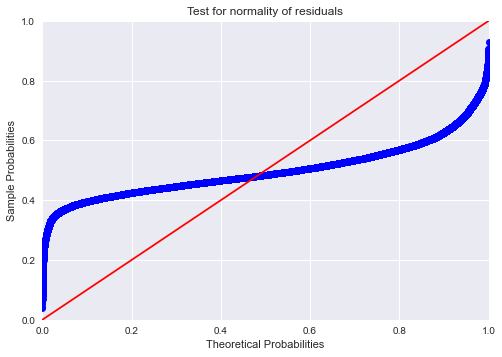

In [199]:
draw_pp_plot(lm3,"Test for normality of residuals");

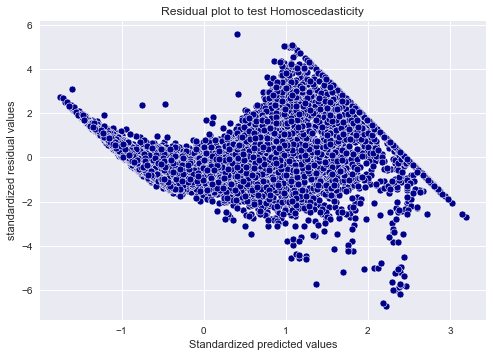

In [200]:
plot_resid_fitted(lm3.fittedvalues,
                  lm3.resid,
                  "Residual plot to test Homoscedasticity")

In [201]:
y_pred_train = lm3.predict(data_train3.drop('price',axis=1))
rmse_train = np.sqrt(mean_squared_error(data_train3['price'],y_pred_train))
print("The Root Mean Squared Error for train {}".format(rmse_train))

The Root Mean Squared Error for train 0.2614712946761062


In [202]:
y_pred_test = lm3.predict(data_test3.drop('price',axis=1))

In [203]:
rmse_test = np.sqrt(mean_squared_error(data_test3['price'],y_pred_test))
print("The Root Mean Squared Error for test {}".format(rmse_test))

The Root Mean Squared Error for test 0.2708579944270211


In [204]:
rsquare = metrics.r2_score(y_pred_test, data_test3['price'])
print("The R squared for our model is {}".format(rsquare))

The R squared for our model is 0.9212153184912829


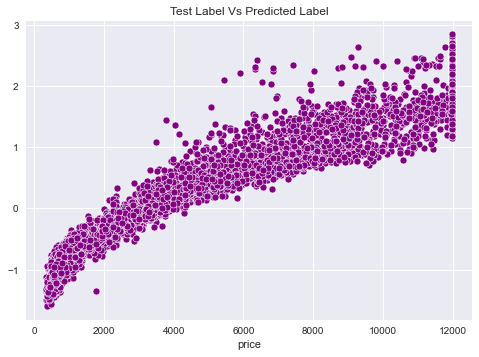

In [205]:
sns.scatterplot(x=y_test['price'], y=y_pred_test, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label');

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

The regression coefficient of the predictor variable ‘carat’ is found to 
be highest (8892.06), which means that for 1 unit increase in carat, 
the price of a Zirconia stone will increase by 8892 units

• ‘Clarity’ is found to be the next most important influencer in deciding 
the price with the coefficient of 434.16

• ‘Color’ and ‘cut’ are the next influencers, with coefficient values of 
267.77 and 104.56 respectively

• The factors ‘depth’ and ‘table’ are found to be insignificant in 
deciding the price of Zirconia stones. VIF score is also high

• Additional factor, volume was introduced in iteration 2 and 3 from 
the dimension variables, x, y and z

• In the final model, only ‘x’ was used as dimension and it was found to 
be the second most significant influencer in deciding the price

• In all the three iterations, the test for homoscedasticity was done by 
plotting the residuals and it was found that in all the three cases it 
follows a funnel shape pattern. It indicates that the residuals are 
heteroscedastic in nature, which violates one of the assumptions

• It means scope for further improvement and would recommend 
further features to be added to improve the prediction of the 
response variable ‘price’

• The recommendation for the company to identify higher profitable 
stones is to classify them based on the carat, dimension, clarity, color 
and cut in the respective order of significance